# Исследование базы данных сервиса Stackoverflow

## Описание проекта
В этом исследовании работа идёт с базой данных StackOverflow — сервиса вопросов и ответов о программировании. 
StackOverflow похож на социальную сеть — пользователи сервиса задают вопросы, отвечают на посты, оставляют комментарии и ставят оценки другим ответам. 
Я исследовала предоставленные данные, сформировала требуемые выгрузки данных с помощью SQL, посчитала различные продуктовые метрики и визуализировала их.

Данный проект представляет из себя серию запросов SQL. Ниже будет представленно задание, что необходимо было посчитать, далее сам запрос и его вывод. Однако, для сокращения, будет выводиться не более 5 первых строк результата.

**1. Посчитать, сколько компаний закрылось.**

    SELECT COUNT(id)
    FROM company
    WHERE status = 'closed'

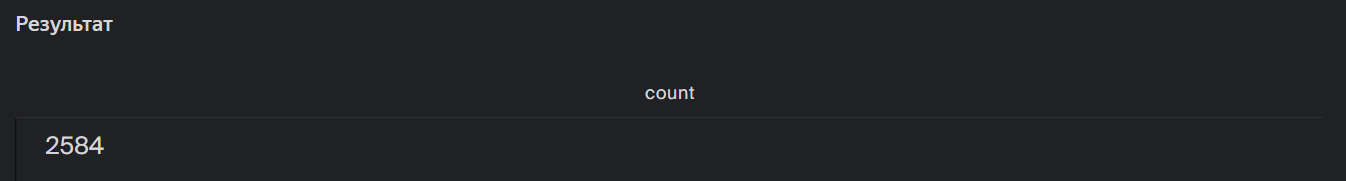

**2. Отобразить количество привлечённых средств для новостных компаний США. Использовать данные из таблицы `company`. Отсортируйть таблицу по убыванию значений в поле `funding_total`.**

    SELECT funding_total
    FROM company
    WHERE category_code = 'news' AND country_code = 'USA'
    ORDER BY funding_total DESC

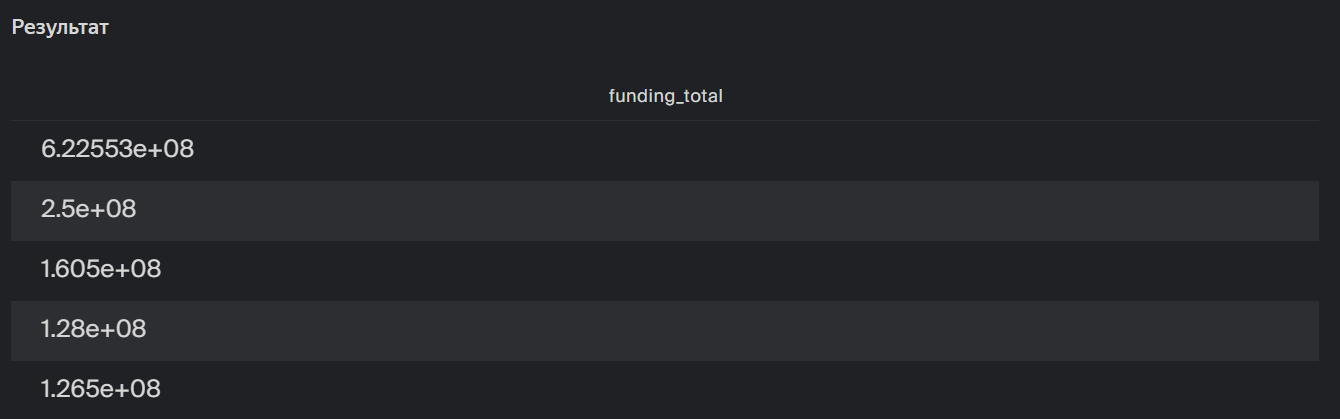

**3. Создать поле с категориями:**
* Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию `high_activity`.
* Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию `middle_activity`.
* Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию `low_activity`.

**Для каждой из категорий, посчитайть округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Вывести на экран категории и среднее число инвестиционных раундов. Отсортировать таблицу по возрастанию среднего.**



    SELECT CASE
               WHEN invested_companies>=100 THEN 'high_activity'
               WHEN invested_companies>=20 THEN 'middle_activity'
               ELSE 'low_activity'
           END AS activity,
           ROUND(AVG(investment_rounds))
    FROM fund
    GROUP BY activity
    ORDER BY ROUND(AVG(investment_rounds));

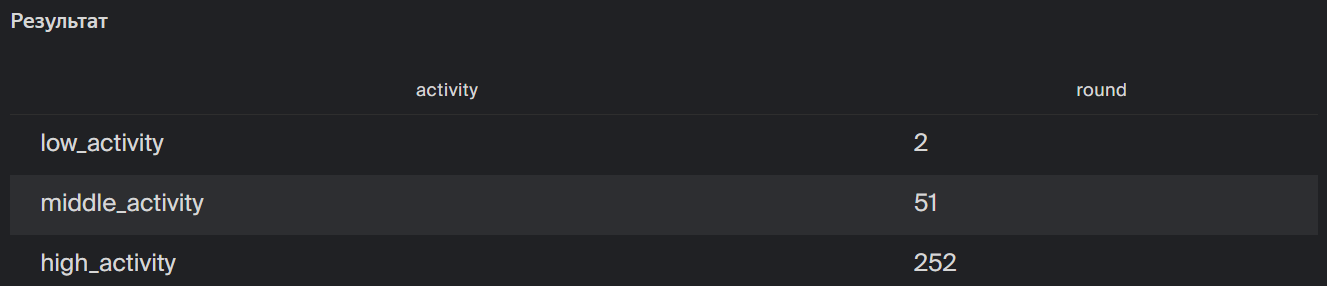

**4. Для каждой компании найти количество учебных заведений, которые окончили её сотрудники. Вывести название компании и число уникальных названий учебных заведений. Составить топ-5 компаний по количеству университетов.**

    SELECT c.name, COUNT(DISTINCT e.instituition) AS count_instituition
    FROM company c 
    JOIN people p ON c.id=p.company_id
    JOIN education e ON p.id=e.person_id
    GROUP BY c.name
    ORDER BY count_instituition DESC
    LIMIT 5;  
    
    
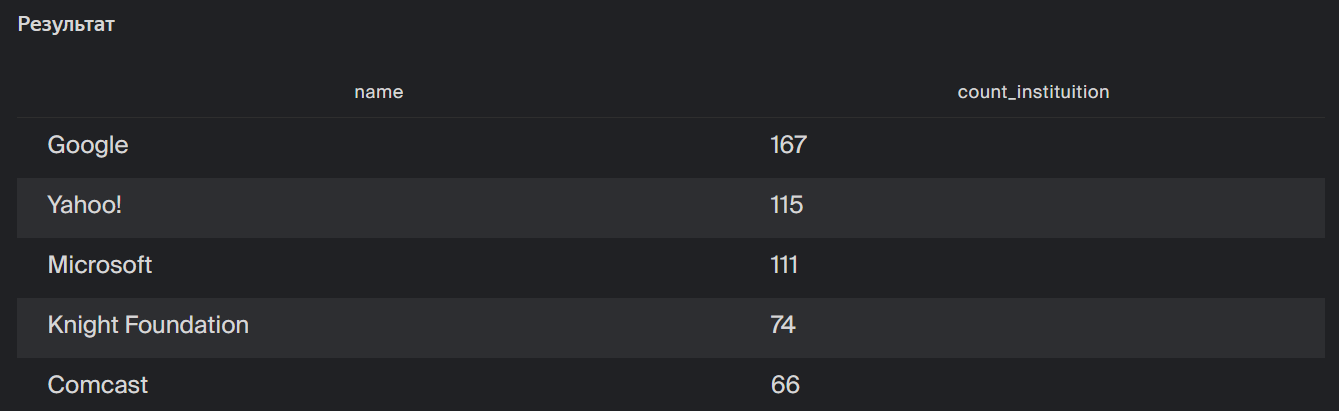

**5. Составить таблицу, куда войдут уникальные пары с номерами сотрудников, которые работают в закрытых компаниях с уникальными названиями, для которых первый раунд финансирования оказался последним, и учебным заведением, которое окончил сотрудник.**


    SELECT DISTINCT person_id, instituition
    FROM education
    WHERE person_id IN (
        SELECT id
        FROM people 
        WHERE company_id IN (
            SELECT DISTINCT id
            FROM company 
            WHERE status = 'closed' AND id IN (
                SELECT company_id
                FROM funding_round
                WHERE is_first_round = 1 AND is_last_round = 1)))
                
                
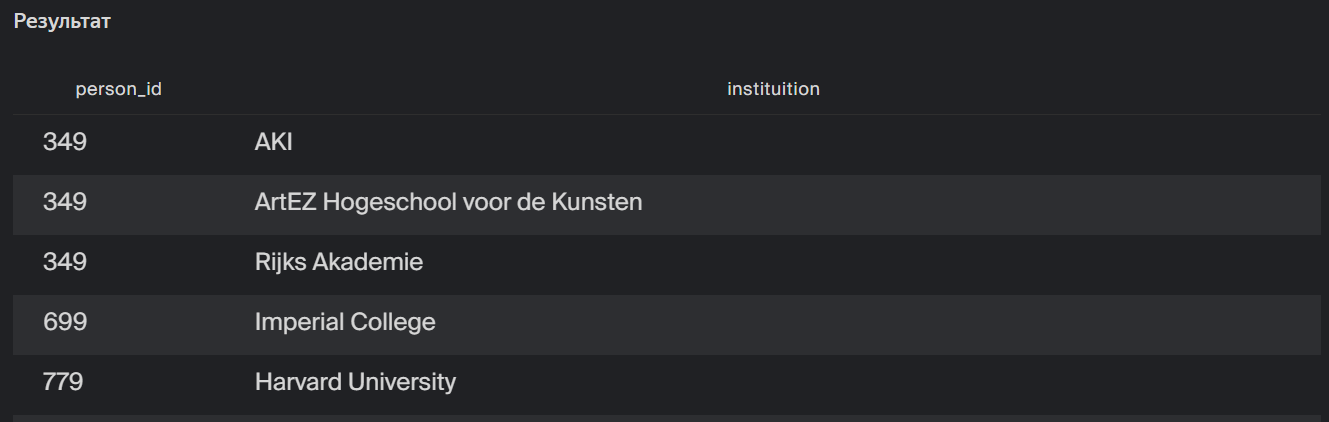   

**6. Составить сводную таблицу и вывести среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортировать таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.**

    WITH t_11 AS(
        SELECT country_code AS country, AVG(funding_total) AS avg_11
        FROM company 
        WHERE EXTRACT(YEAR FROM founded_at) = 2011
        GROUP BY country),
    t_12 AS(
        SELECT country_code AS country, AVG(funding_total) AS avg_12
        FROM company 
        WHERE EXTRACT(YEAR FROM founded_at) = 2012
        GROUP BY country),
    t_13 AS(
        SELECT country_code AS country, AVG(funding_total) AS avg_13
        FROM company 
        WHERE EXTRACT(YEAR FROM founded_at) = 2013
        GROUP BY country)

    SELECT t_11.country, t_11.avg_11, t_12.avg_12, t_13.avg_13
    FROM t_11
        JOIN t_12 ON t_11.country = t_12.country
        JOIN t_13 ON t_13.country = t_12.country
    ORDER BY t_11.avg_11 DESC    
    
    
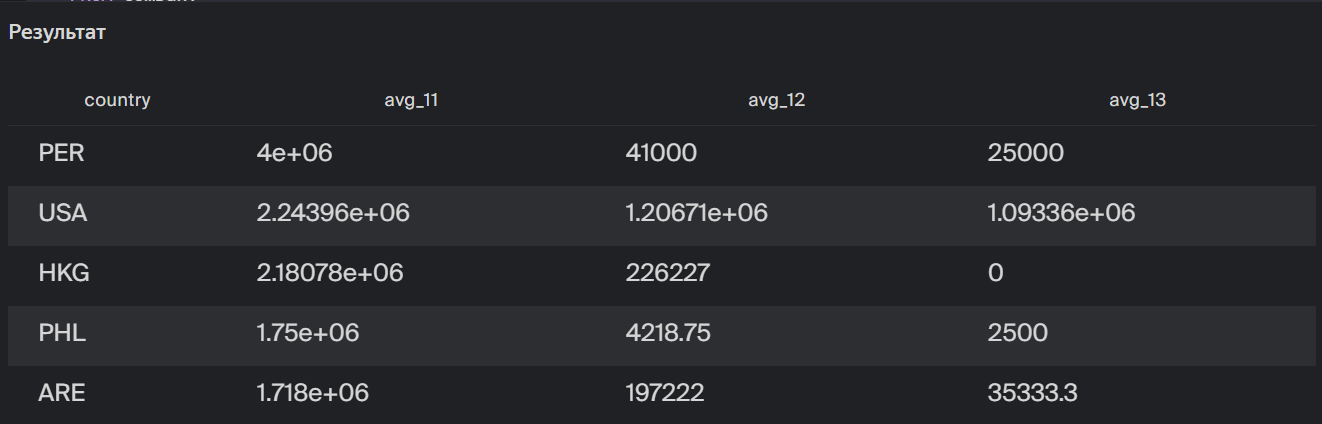